In [3]:
import pandas as pd
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('placement (1).csv')

In [7]:
df

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57
...,...,...
195,6.93,2.46
196,5.89,2.57
197,7.21,3.24
198,7.63,3.96


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cgpa     200 non-null    float64
 1   package  200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [9]:
df.describe()

,cgpa,package
count,200.000000,200.000000
mean,6.990500,2.996050
std,1.069409,0.691644
min,4.260000,1.370000
25%,6.190000,2.487500
50%,6.965000,2.995000
75%,7.737500,3.492500
max,9.580000,4.620000


In [10]:
df.shape

(200, 2)

Text(0, 0.5, 'Package(in lpa)')

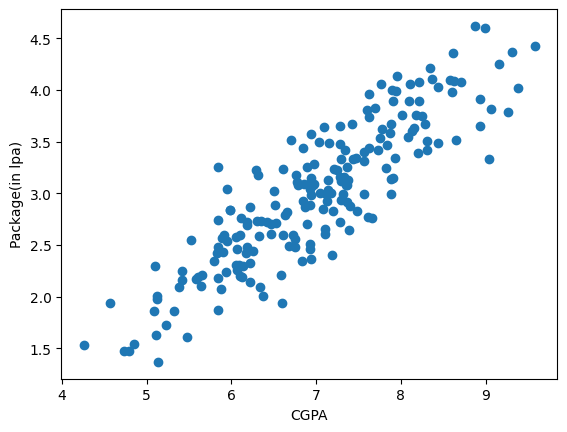

In [11]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

Text(0, 0.5, 'Package(in lpa)')

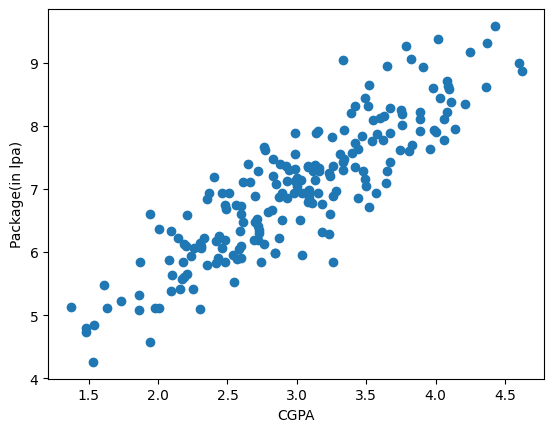

In [12]:
plt.scatter(df['package'], df['cgpa'])
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [13]:
x = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [14]:
x

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94
...,...
195,6.93
196,5.89
197,7.21
198,7.63


In [15]:
y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [18]:
x_train

,cgpa
137,7.14
163,8.93
111,5.42
123,5.10
109,7.77
...,...
43,7.66
22,6.14
72,7.78
15,7.25


In [19]:
y_train

137    3.13
163    3.91
111    2.25
123    2.30
109    4.06
       ... 
43     2.76
22     2.30
72     3.62
15     3.23
168    3.52
Name: package, Length: 160, dtype: float64

In [20]:
from sklearn.linear_model import LinearRegression

In [22]:
model = LinearRegression()

In [25]:
model.fit(x_train,y_train)

LinearRegression()

Text(0, 0.5, 'Package')

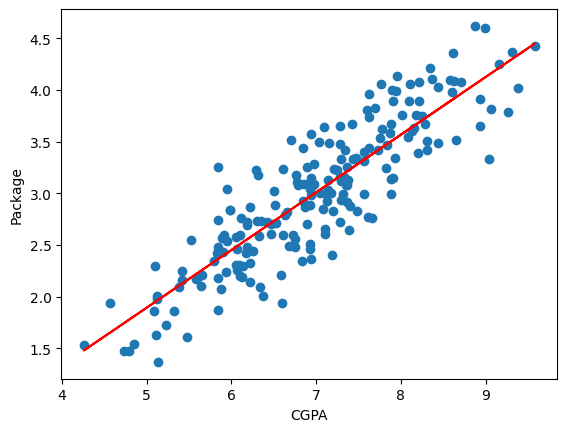

In [29]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(x_train,model.predict(x_train),color='red')
plt.xlabel('CGPA')
plt.ylabel('Package')

In [30]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [31]:
prediction = model.predict(x_test)

In [33]:
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [34]:
mean_absolute_error(y_test, prediction)

0.2884710931878175

In [36]:
mean_squared_error(y_test,prediction)

0.12129235313495527

In [37]:
np.sqrt(mean_squared_error(y_test,prediction))

0.34827051717731616

In [38]:
r2_score(y_test, prediction)

0.780730147510384

In [39]:
r2 = r2_score(y_test, prediction)

In [40]:
1 - ((1-r2)*(40-1)/(40-1-1))

0.7749598882343415

In [47]:
new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)

new_df1 = new_df1[['cgpa','random_feature','package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.565012,3.26
1,5.12,0.724379,1.98
2,7.82,0.326094,3.25
3,7.42,0.029700,3.67
4,6.94,0.119278,3.57


Text(0, 0.5, 'Package(in lpa)')

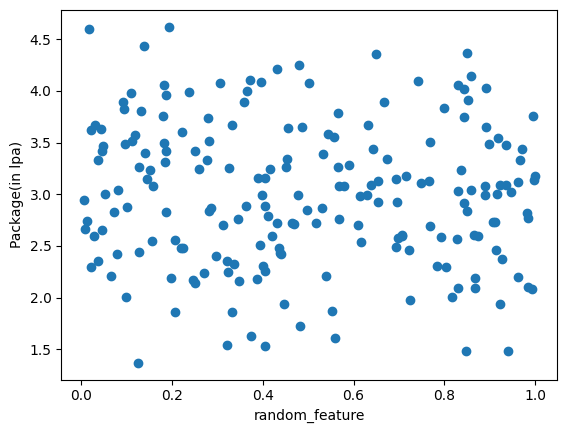

In [53]:
plt.scatter(new_df1['random_feature'],new_df1['package'])
plt.xlabel('random_feature')
plt.ylabel('Package(in lpa)')

In [57]:
X = new_df1.iloc[:,0:2]
y = new_df1.iloc[:,-1]

In [58]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [60]:
lr = LinearRegression()

In [61]:
lr.fit(X_train,y_train)

LinearRegression()

In [63]:

y_pred = lr.predict(X_test)

In [65]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.7803589696287354


In [67]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.768486481500559

In [73]:
new_df2 = df.copy()

new_df2['iq'] = new_df2['package'] + (np.random.randint(-12,12,200)/10)

new_df2 = new_df2[['cgpa','iq','package']]

In [74]:
new_df2

,cgpa,iq,package
0,6.89,2.16,3.26
1,5.12,0.78,1.98
2,7.82,3.45,3.25
3,7.42,4.27,3.67
4,6.94,4.27,3.57
...,...,...,...
195,6.93,2.16,2.46
196,5.89,3.27,2.57
197,7.21,3.74,3.24
198,7.63,3.36,3.96


Text(0, 0.5, 'Package(in lpa)')

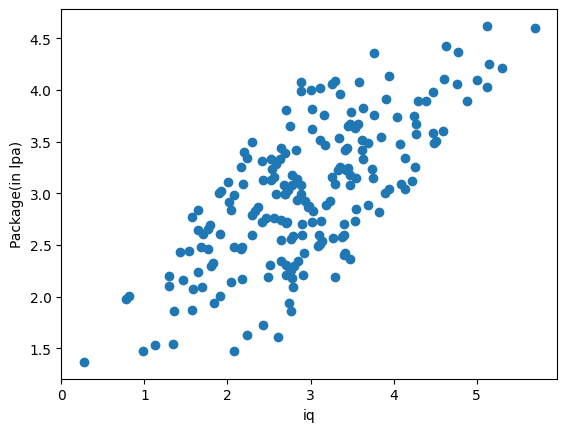

In [75]:
plt.scatter(new_df2['iq'],new_df2['package'])
plt.xlabel('iq')
plt.ylabel('Package(in lpa)')

In [79]:
np.random.randint(-100,100)

62

In [81]:
X = new_df2.iloc[:,0:2]
y = new_df2.iloc[:,-1]

In [84]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [89]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [92]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.8167183838334751


In [96]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.8068112694460954